In [1]:
from sklearn import datasets                       # Load built-in datasets
from sklearn.model_selection import train_test_split  # Split data into train/test
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision tree model + visualization
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
import pandas as pd                                # Data handling (tables)
import matplotlib.pyplot as plt                    # Plotting graphs
import seaborn as sns                              # Advanced plots
import numpy as np                                 # Numerical calculations


In [2]:
iris = datasets.load_iris()                        # Load iris dataset from sklearn
X = iris.data                                      # Features (sepal/petal measurements)
y = iris.target                                    # Target (species labels as numbers)

df = pd.DataFrame(X, columns=iris.feature_names)   # Put features into a DataFrame
df['target'] = y                                   # Add target column
df['species'] = df['target'].map({0: 'setosa',     # Map numeric labels → names
                                  1: 'versicolor',
                                  2: 'virginica'})


In [3]:
print(df.shape)        # Print number of rows and columns
print(df.head())       # Show first 5 rows
print(df.info())       # Show column info (types, non-null counts)
print(df.describe())   # Show summary stats (mean, std, min, max, etc.)


(150, 6)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4  

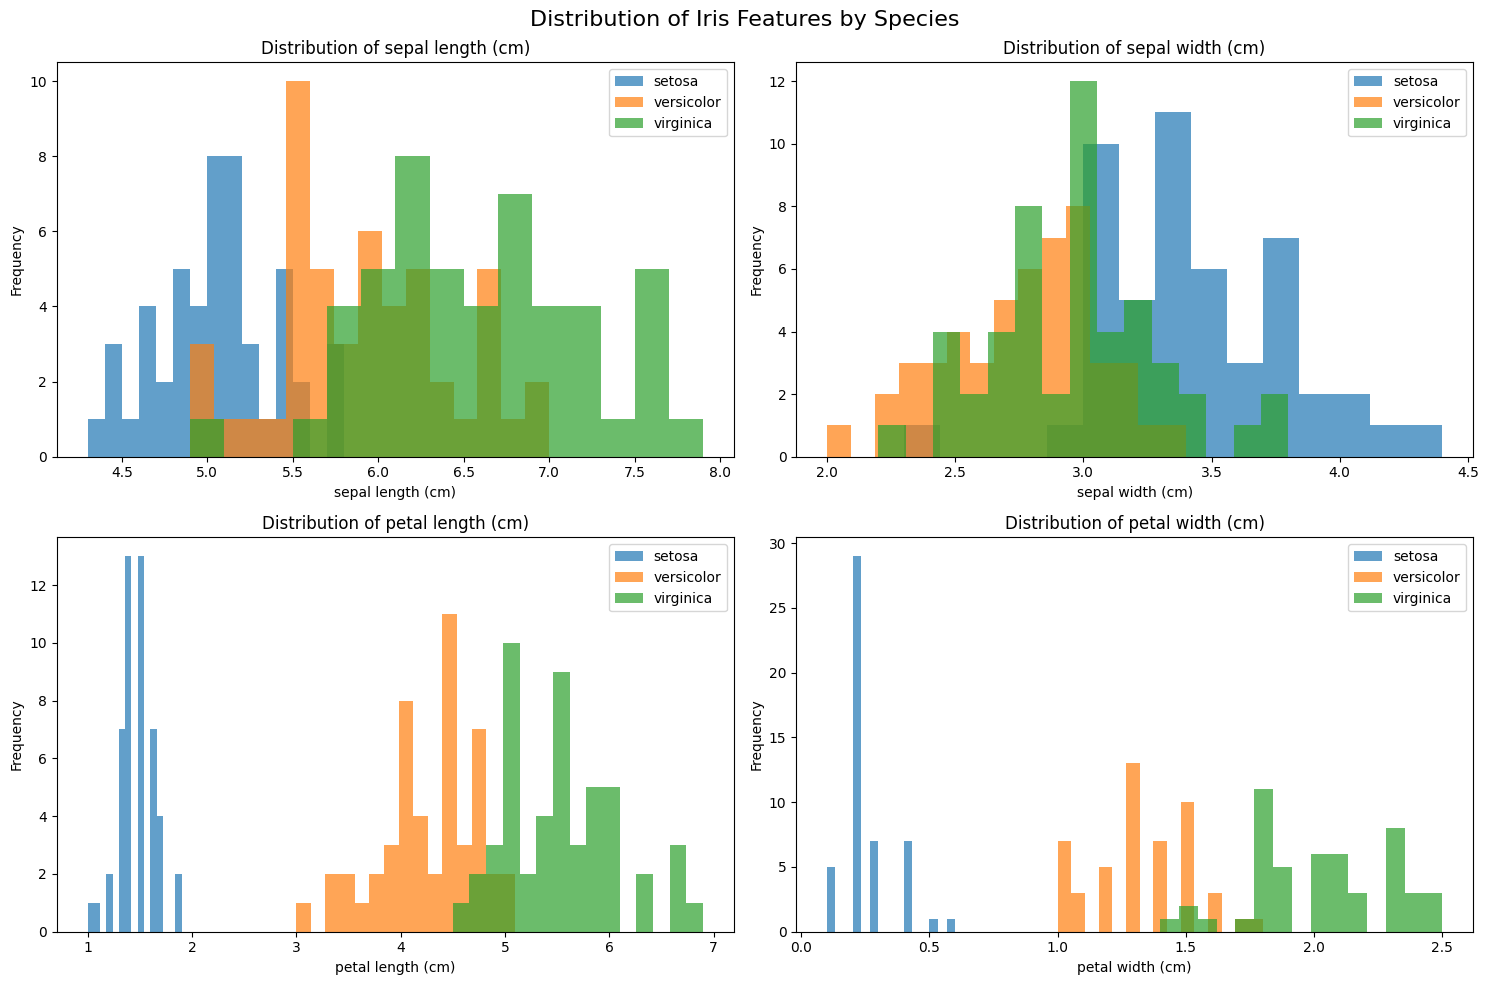

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))   # Create 2x2 subplot grid
fig.suptitle('Distribution of Iris Features by Species', fontsize=16)  # Main title

features = iris.feature_names                      # Get feature names
for i, feature in enumerate(features):             # Loop through each feature
    ax = axes[i//2, i%2]                           # Select subplot position
    for species in df['species'].unique():         # Loop through species
        data = df[df['species'] == species][feature]  # Select feature values for species
        ax.hist(data, alpha=0.7, label=species, bins=15)  # Plot histogram
    ax.set_xlabel(feature)                         # X-axis label
    ax.set_ylabel('Frequency')                     # Y-axis label
    ax.legend()                                    # Show legend (species)
    ax.set_title(f'Distribution of {feature}')     # Subplot title

plt.tight_layout()                                 # Adjust layout
plt.show()                                         # Show plot


In [5]:
X_train, X_test, y_train, y_test = train_test_split(  # Split dataset
    X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")    # Print train samples
print(f"Testing set size: {X_test.shape[0]}")      # Print test samples
print(f"Features: {X_train.shape[1]}")             # Print number of features


Training set size: 120
Testing set size: 30
Features: 4


In [6]:
dt_classifier = DecisionTreeClassifier(            # Create Decision Tree
    random_state=42, max_depth=4, min_samples_split=2,
    min_samples_leaf=1, criterion='gini'
)
dt_classifier.fit(X_train, y_train)                # Train model

print("Decision Tree trained!")                    # Print confirmation
print(f"Tree depth: {dt_classifier.get_depth()}")  # Print tree depth
print(f"Leaves: {dt_classifier.get_n_leaves()}")   # Print number of leaves

print("Feature importances:")                      # Print feature importances
for i, importance in enumerate(dt_classifier.feature_importances_):
    print(f"  {iris.feature_names[i]}: {importance:.4f}")


Decision Tree trained!
Tree depth: 4
Leaves: 7
Feature importances:
  sepal length (cm): 0.0063
  sepal width (cm): 0.0169
  petal length (cm): 0.5656
  petal width (cm): 0.4112


In [7]:
y_train_pred = dt_classifier.predict(X_train)      # Predictions on train set
y_test_pred = dt_classifier.predict(X_test)        # Predictions on test set

train_accuracy = accuracy_score(y_train, y_train_pred)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)     # Testing accuracy

print(f"Training Accuracy: {train_accuracy:.4f}")  # Print train accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")       # Print test accuracy

print("\nClassification Report (Test):")           # Classification report
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_test_pred)         # Confusion matrix
print("\nConfusion Matrix (Test):")
print(cm)                                          # Print confusion matrix


Training Accuracy: 0.9917
Test Accuracy: 0.9333

Classification Report (Test):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix (Test):
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


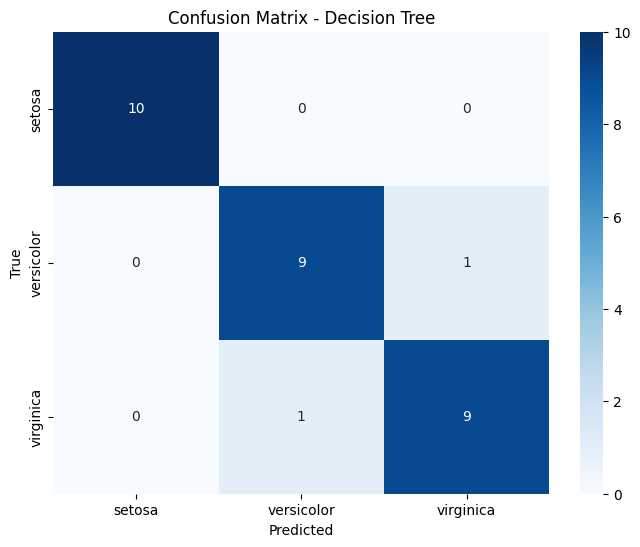

In [8]:
plt.figure(figsize=(8, 6))                         # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # Create heatmap
            xticklabels=iris.target_names,         # X-axis labels
            yticklabels=iris.target_names)         # Y-axis labels
plt.title('Confusion Matrix - Decision Tree')      # Title
plt.xlabel('Predicted')                            # X-axis label
plt.ylabel('True')                                 # Y-axis label
plt.show()                                         # Show plot


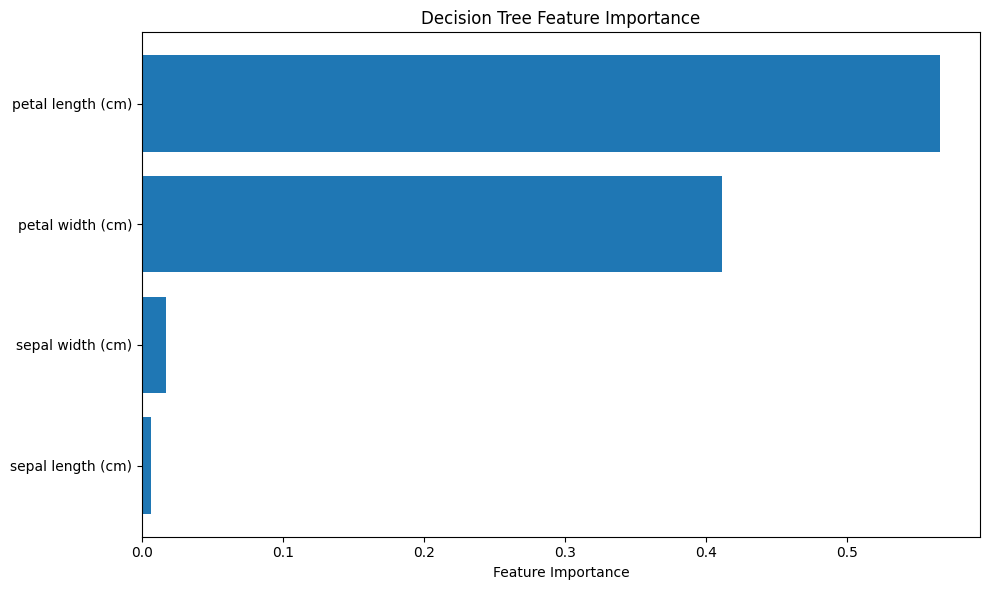

In [9]:
plt.figure(figsize=(10, 6))                        # Set figure size
feature_importance = pd.DataFrame({                # Create DataFrame
    'feature': iris.feature_names,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)  # Sort

plt.barh(feature_importance['feature'], feature_importance['importance'])  # Bar chart
plt.xlabel('Feature Importance')                    # X-axis label
plt.title('Decision Tree Feature Importance')       # Title
plt.tight_layout()                                  # Adjust layout
plt.show()                                          # Show plot


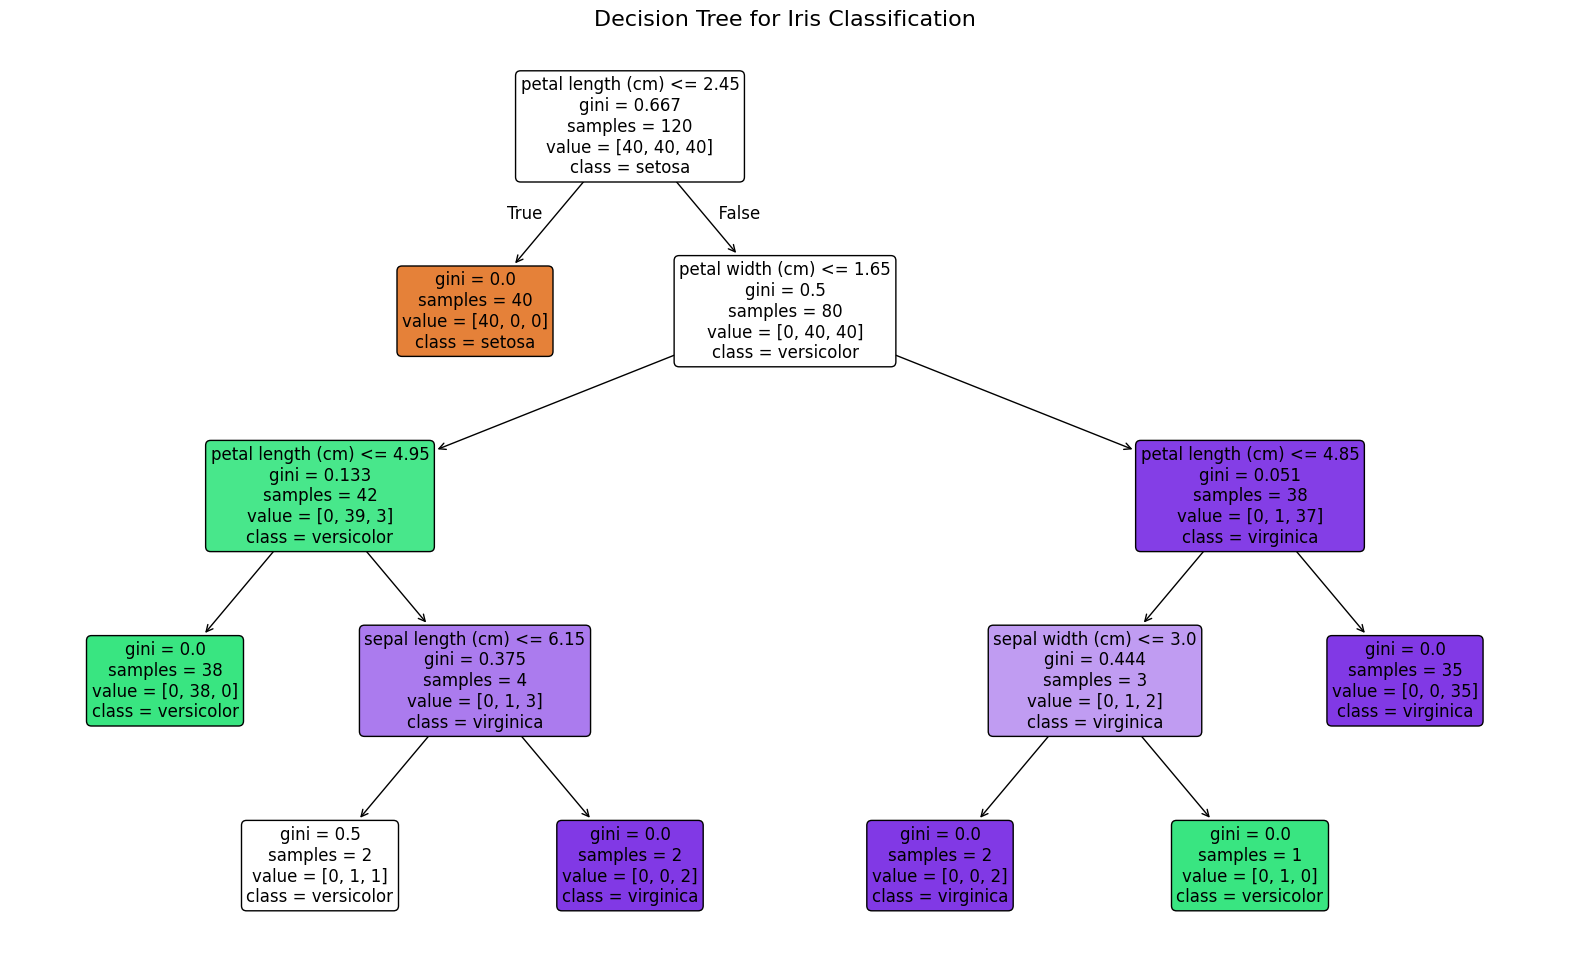

In [10]:
plt.figure(figsize=(20, 12))                       # Set figure size
plot_tree(dt_classifier,                           # Draw decision tree
          feature_names=iris.feature_names,        # Show feature names
          class_names=iris.target_names,           # Show species names
          filled=True, rounded=True, fontsize=12)  # Style
plt.title('Decision Tree for Iris Classification', fontsize=16)  # Title
plt.show()                                         # Show tree


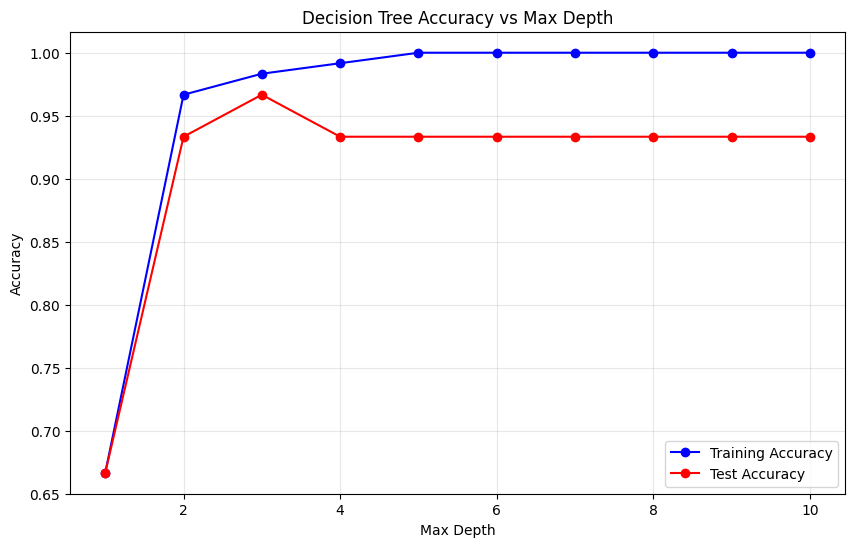

Best test accuracy: 0.9667 at depth 3


In [11]:
depths = range(1, 11)                              # Depths 1 to 10
train_accuracies = []                              # Store train acc
test_accuracies = []                               # Store test acc

for depth in depths:                               # Loop over depths
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)  # New model
    dt.fit(X_train, y_train)                       # Train model
    train_pred = dt.predict(X_train)               # Predict train
    test_pred = dt.predict(X_test)                 # Predict test
    train_accuracies.append(accuracy_score(y_train, train_pred))  # Store train acc
    test_accuracies.append(accuracy_score(y_test, test_pred))     # Store test acc

plt.figure(figsize=(10, 6))                        # Set figure size
plt.plot(depths, train_accuracies, 'bo-', label='Training Accuracy')  # Train line
plt.plot(depths, test_accuracies, 'ro-', label='Test Accuracy')       # Test line
plt.xlabel('Max Depth')                            # X-axis label
plt.ylabel('Accuracy')                             # Y-axis label
plt.title('Decision Tree Accuracy vs Max Depth')   # Title
plt.legend()                                       # Show legend
plt.grid(True, alpha=0.3)                          # Grid
plt.show()                                         # Show plot

print(f"Best test accuracy: {max(test_accuracies):.4f} at depth {depths[np.argmax(test_accuracies)]}")
# Print best depth
